# Loan Data Exploration
#### Submitted By: Bharati Malik

## Preliminary Wrangling

This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
LoanData = pd.read_csv('prosperLoanData.csv')
LoanData.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
LoanData.shape

(113937, 81)

In [4]:
# making a copy of original file
df = LoanData.copy()

In [5]:
# this displays a concise summary of the dataframe, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

##### Converting date columns to datetime format

In [6]:
type(df['ListingCreationDate'][0])

str

In [7]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [8]:
type(df['ListingCreationDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

In [10]:
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])

In [11]:
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])

In [12]:
# Dropping columns for which we have lot of null values
very_few_non_null_records = ['CreditGrade','LoanFirstDefaultedCycleNumber','ScorexChangeAtTimeOfListing',\
                    'ProsperPrincipalOutstanding','ProsperPrincipalBorrowed','TotalProsperLoans',\
                    'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',\
                    'ProsperPaymentsOneMonthPlusLate','GroupKey']

df.drop(very_few_non_null_records, axis=1, inplace = True)

> As per data dictionary `EstimatedEffectiveYield`, `EstimatedLoss`, `EstimatedReturn`, `ProsperRating (numeric)`, `ProsperRating (Alpha)`,`ProsperScore` were populated post July 2009, thus its better to not consider these variables as considering these variables may cause a bias. But if someone needs to analyze loan performance post 2009, then these variables can be taken into consideration

> I will also remove `BorrowerState` from this analysis. If incase someone needs to analyze loan information at state level, then this column could be used for further analysis. For the scope of this project, I'm not planning to perform state level analysis on the provided data

> Similary, if we want to identify which `Occupation` people are more prone to take a loan or default on a loan then this variable can be utilized. I'm dropping this variable from my analysis

> I'm not performing any quarter level analysis and thus dropping `LoanOriginationQuarter` column

In [13]:
# Creating a list of columns mentioned above that won't be considered for this analysis and dropping them all at once
cols = ['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',\
       'ProsperRating (Alpha)','ProsperScore', 'BorrowerState', 'Occupation','LoanOriginationQuarter']

df.drop(cols, axis=1, inplace = True)

In [14]:
# Dropping few more columns from my analysis
cols_more = ['ListingKey','ListingNumber','MemberKey','LoanKey','LoanNumber','LoanCurrentDaysDelinquent',\
             'PercentFunded','Recommendations','LoanMonthsSinceOrigination','CurrentlyInGroup','BorrowerRate',\
            'LenderYield','OpenRevolvingMonthlyPayment', 'BankcardUtilization', 'AvailableBankcardCredit','RevolvingCreditBalance']

df.drop(cols_more, axis=1, inplace = True)

In [15]:
# Dropping columns that start with 'LP_' I won't use them for my analysis
df = df[df.columns.drop(list(df.filter(regex='LP_')))]

In [16]:
# Dropping columns: InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors
df = df[df.columns.drop(list(df.filter(regex='Invest')))]

In [17]:
# Dropping columns: CreditScoreRangeLower, CreditScoreRangeUpper as I don't want to perform credit range analysis
df = df[df.columns.drop(list(df.filter(regex='CreditScoreRange')))]

In [18]:
# Dropping columns: FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years
df = df[df.columns.drop(list(df.filter(regex='CreditLine')))]

# If we have to further analyze more on credit lines, we can skip dropping these columns

In [19]:
# Dropping columns: PublicRecordsLast10Years, PublicRecordsLast12Months
df = df[df.columns.drop(list(df.filter(regex='PublicRecords')))]

In [20]:
# Dropping columns: TotalTrades, TradesNeverDelinquent, TradesOpenedLast6Months
df = df[df.columns.drop(list(df.filter(regex='Trades')))]

In [21]:
# Dropping columns: CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, LoanCurrentDaysDelinquent
df = df[df.columns.drop(list(df.filter(regex='Delinque')))]

In [22]:
# Dropping columns: InquiriesLast6Months, TotalInquiries
df = df[df.columns.drop(list(df.filter(regex='Inqui')))]

In [23]:
# Dropping columns: TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPrincipalOutstanding
# ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed
df = df[df.columns.drop(list(df.filter(regex='Prosper')))]

# If someone needs to perform specific analysis, then these columns can be considered

In [24]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

> One of my future scope for this project would be to bin the income ranges and identify its effects on the `LoanStatus`. Because of time-constraints, I will drop `IncomeRange` column from my current analysis. This column can also be used to perform any data quality checks to identify if the range mentioned is inline with `Employment Status` and `StatedMonthlyIncome`

In [25]:
df.drop('IncomeRange', axis=1, inplace = True)

> If I were to perform any time-series analysis, then I could use various Date columns in the dataset. Since this analysis is only to explore features that have direct impact on `LoanStatus`, I would thus drop other date columns for this analysis. These dates can ofcourse be used to perform data quality checks for various number of reasons. 

In [26]:
df.drop(['LoanOriginationDate','DateCreditPulled'], axis=1, inplace = True)

In [27]:
df.EmploymentStatusDuration.isna().sum()

7625

> Another future scope would be to further assess `EmploymentStatusDuration` by binning this column and identifying if lesser the EmploymentStatusDuration higher/lower is there chances to default?

In [28]:
df.drop('EmploymentStatusDuration', axis=1, inplace = True)

In [29]:
df.BorrowerAPR.isna().sum()

25

> Since the number of records for `BorrowerAPR` columns which are null are very less, we can drop those without losing any important correlations

In [30]:
# Removing loans with missing borrower APR information
df = df[~df.BorrowerAPR.isna()]

In [31]:
# Creating a new column to identify whether or not the loan is in open state or closed state
df['Closed_Open'] = np.where(df.ClosedDate.isnull(), 'Open', 'Closed')

> If the loan is not closed, then it is open. We can identify open loans when `ClosedDate` is null

In [32]:
df[['ClosedDate','Closed_Open']].sample(5)

ClosedDate Closed_Open
104227        NaT        Open
37939         NaT        Open
4808   2011-04-29      Closed
11945         NaT        Open
20757  2011-11-13      Closed

> I will now dropping ClosedDate column. Ofcourse if someone wants to analyze the time it takes to close a loan on an average, then considering the date values would make sense

In [33]:
df.drop('ClosedDate', axis=1, inplace = True)

In [34]:
# Categorizing ListingCategory (numeric) feature
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(list_dict)

df.drop('ListingCategory (numeric)', axis=1, inplace=True)  

##### Final Dataframe for analysis

In [35]:
df.sample(5)

ListingCreationDate  Term LoanStatus  BorrowerAPR EmploymentStatus  \
21903 2012-07-26 23:59:51.530    60    Current      0.26887    Self-employed   
68605 2013-08-31 15:00:12.000    36    Current      0.19236         Employed   
69713 2013-04-22 16:19:41.567    60    Current      0.17522         Employed   
63545 2014-02-05 09:51:28.393    60    Current      0.16304         Employed   
29936 2008-04-02 12:27:30.890    36  Defaulted      0.25680        Full-time   

       IsBorrowerHomeowner  OpenRevolvingAccounts  DebtToIncomeRatio  \
21903                False                      5                NaN   
68605                 True                      8               0.24   
69713                False                      5               0.14   
63545                False                     16               0.26   
29936                 True                      8               0.25   

       IncomeVerifiable  StatedMonthlyIncome  LoanOriginalAmount  \
21903             False          7000.000000               15000   
68605              True         16666.666667               13000   
69713              True          4833.333333                6000   
63545              True          8333.333333               30000   
29936              True          5666.666667                3000   

       MonthlyLoanPayment Closed_Open     ListingCategory  
21903              434.40        Open                Auto  
68605              454.41        Open  Debt Consolidation  
69713              143.34        Open  Debt Consolidation  
63545              698.05        Open  Debt Consolidation  
29936               85.60      Closed  Debt Consolidation

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 14 columns):
ListingCreationDate      113912 non-null datetime64[ns]
Term                     113912 non-null int64
LoanStatus               113912 non-null object
BorrowerAPR              113912 non-null float64
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113912 non-null bool
OpenRevolvingAccounts    113912 non-null int64
DebtToIncomeRatio        105358 non-null float64
IncomeVerifiable         113912 non-null bool
StatedMonthlyIncome      113912 non-null float64
LoanOriginalAmount       113912 non-null int64
MonthlyLoanPayment       113912 non-null float64
Closed_Open              113912 non-null object
ListingCategory          113912 non-null object
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 11.5+ MB


In [37]:
df.isna().sum()

ListingCreationDate         0
Term                        0
LoanStatus                  0
BorrowerAPR                 0
EmploymentStatus         2230
IsBorrowerHomeowner         0
OpenRevolvingAccounts       0
DebtToIncomeRatio        8554
IncomeVerifiable            0
StatedMonthlyIncome         0
LoanOriginalAmount          0
MonthlyLoanPayment          0
Closed_Open                 0
ListingCategory             0
dtype: int64

In [38]:
# descriptive statistics 
df.describe()

Term    BorrowerAPR  OpenRevolvingAccounts  DebtToIncomeRatio  \
count  113912.000000  113912.000000          113912.000000      105358.000000   
mean       40.831308       0.218828               6.971320           0.275993   
std        10.437112       0.080364               4.630327           0.551814   
min        12.000000       0.006530               0.000000           0.000000   
25%        36.000000       0.156290               4.000000           0.140000   
50%        36.000000       0.209760               6.000000           0.220000   
75%        36.000000       0.283810               9.000000           0.320000   
max        60.000000       0.512290              51.000000          10.010000   

       StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  
count         1.139120e+05       113912.000000       113912.000000  
mean          5.606973e+03         8338.015661          272.511490  
std           7.478338e+03         6245.940592          192.697031  
min           0.000000e+00         1000.000000            0.000000  
25%           3.200000e+03         4000.000000          131.685000  
50%           4.666667e+03         6500.000000          217.740000  
75%           6.817083e+03        12000.000000          371.580000  
max           1.750003e+06        35000.000000         2251.510000

In [39]:
df.shape

(113912, 14)

In [40]:
df.to_csv(r'FeaturedDataset.csv', index = False)

#### What is the structure of your dataset?

> The first cut of the dataset that I will consider for my analysis contains 113,912 loans with 14 features. If further analysis helps me identify that any other columns/features are not impacting the `LoanStatus` column, then I will drop that feature.

> My analysis will focus on factors that are can impact `LoanStatus`.

#### What is/are the main feature(s) of interest in your dataset?

> I will focus on identifying factors/features to help predict `LoanStatus`

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will further explore the 19 features/columns that I have kept in my dataframe. If during my analysis ahead, I feel that I don't want to consider a particular column or if a particular feature doesn't make sense then I will drop them that time

## Univariate Exploration

In [41]:
df.sample(5)

ListingCreationDate  Term  LoanStatus  BorrowerAPR EmploymentStatus  \
9560  2007-03-02 10:06:34.997    36   Completed      0.08684        Full-time   
79885 2012-05-09 09:45:13.207    60     Current      0.35838         Employed   
75581 2011-01-19 10:00:05.230    36  Chargedoff      0.30532         Employed   
38345 2014-01-29 15:36:57.037    36     Current      0.19501         Employed   
63950 2013-03-21 11:50:51.593    36     Current      0.35356         Employed   

       IsBorrowerHomeowner  OpenRevolvingAccounts  DebtToIncomeRatio  \
9560                  True                      7               0.06   
79885                False                      6               0.09   
75581                False                      5               0.08   
38345                 True                      5               0.06   
63950                False                      9               0.90   

       IncomeVerifiable  StatedMonthlyIncome  LoanOriginalAmount  \
9560               True          4666.666667                3500   
79885              True          2750.000000                4000   
75581              True          5833.333333                5000   
38345              True          8833.333333               10000   
63950              True          3333.333333                4000   

       MonthlyLoanPayment Closed_Open     ListingCategory  
9560               108.36      Closed       Not Available  
79885              136.98        Open            Business  
75581              204.10      Closed               Other  
38345              350.83        Open               Other  
63950              172.76        Open  Debt Consolidation

In [42]:
# Let me first start by exploring the unique values of my dependent variable LoanStatus
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [43]:
# Let me group all Past Due loans under a unique name: 'Past Due' in order to consolidate the numbers
df['LoanStatus'] = df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

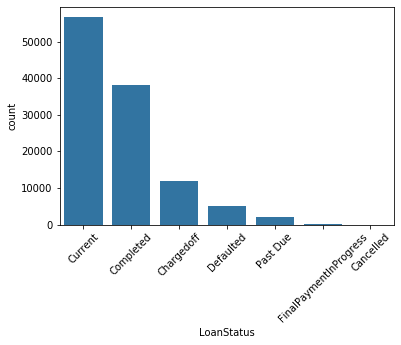

In [44]:
# Visualizing the dependent variable which is the key variable of interest
base_color = sb.color_palette()[0]
cat_order = df['LoanStatus'].value_counts().index
sb.countplot(data = df, x = 'LoanStatus', color = base_color, order = cat_order)
plt.xticks(rotation = 45)

In [45]:
# Percentage of loans in each status in the decreasing order
PercentByStatus = pd.DataFrame(df.groupby('LoanStatus')['LoanStatus'].count())
PercentByStatus['PctLoans'] = (PercentByStatus['LoanStatus']/PercentByStatus['LoanStatus'].sum())*100
PercentByStatus.sort_values(by='PctLoans', ascending=False)

LoanStatus   PctLoans
LoanStatus                                   
Current                      56576  49.666409
Completed                    38049  33.402100
Chargedoff                   11992  10.527425
Defaulted                     5018   4.405155
Past Due                      2067   1.814559
FinalPaymentInProgress         205   0.179963
Cancelled                        5   0.004389

> We see that approximately 54% of our loans are either current or defaulted

> One good news is that only about 2% of loans were past due, meaning that very few times did the customer missed onto the payment

Let us see the number of records for each year of ListingCreationDate

In [46]:
df['ListingCreationDate'].groupby(df.ListingCreationDate.dt.year).agg('count')

ListingCreationDate
2006     6211
2007    11557
2008    11263
2009     2206
2010     5530
2011    11442
2012    19556
2013    35413
2014    10734
Name: ListingCreationDate, dtype: int64

Lets see the distribution of `Term` column in our dataset

In [47]:
base_color = sb.color_palette()[0]
cat_order = df['Term'].value_counts().index
sb.countplot(data = df, x = 'Term', color = base_color, order = cat_order);

> Majority of our loans lie for a term of 36 months

Lets see the distribution of `IsBorrowerHomeowner` column in our dataset

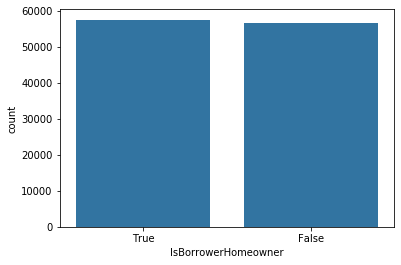

In [48]:
base_color = sb.color_palette()[0]
cat_order = df['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color, order = cat_order);

> Early on when I kept this feature in my dataset, my thought process was that probability of people who would default/not pay their loan might have some kind of relation whether or not they are home owners or not. But as we see, it doesn't matter much

In [49]:
df.drop('IsBorrowerHomeowner', axis=1, inplace = True)

Lets see the distribution of `IncomeVerifiable` column in our dataset

(-1.10089039951967,
 1.1077167801350472,
 -1.1076875836966507,
 1.1009195959580664)

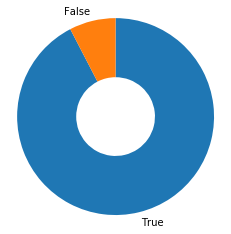

In [50]:
sorted_counts = df['IncomeVerifiable'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6});
plt.axis('square')

> As income can be verified for majority of the loans, this means that Prosper can conduct due diligence while processing the loan

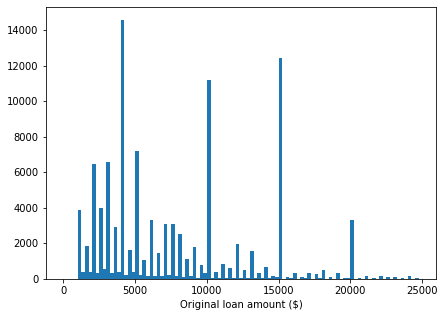

In [51]:
# Distribution of Loan Original Amount
bins_smi = np.arange(0, 25000, 250)
plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins=bins_smi)
plt.xlabel('Original loan amount ($)');

> There are some spikes/outliers in the dataset. Otherwise mose of the loans are multiple of ~1k

In [52]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 25000, 500)
plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins_smi);

> The distribution of stated monthly income is right screwed, with most of stated monthly income less than 25k.

In [53]:
# Plotting a standard-scaled plot for DebtToIncomeRatio
binsize = 0.03
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df[df['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Number of Borrowers')
plt.xlim(0,1.5);

> Very few number of borrowers have a debt to income ratio more than 1 and majority of the distribution is between 0.1 and 0.4

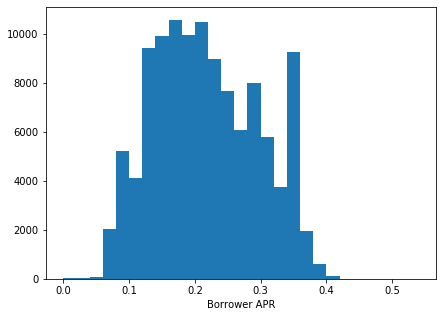

In [54]:
bins = np.arange(0, df.BorrowerAPR.max()+0.03, 0.02)
plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

> From the above chart, we notice that the distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

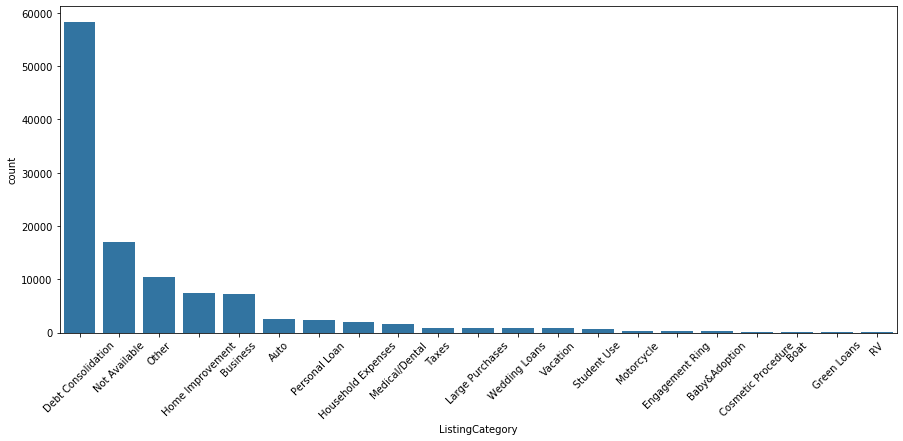

In [55]:
# Distribution of Listing Category

plt.figure(figsize=[15, 6])
base_color = sb.color_palette()[0]
cat_order = df['ListingCategory'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory', color = base_color, order = cat_order)
plt.xticks(rotation = 45);

> From above we can see that debt consolidation is the most popular type of listing/loan at Prosper. What we may want to know is if there is a particular listing with high number of charged-off or defaulted loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Although, I noticed several outliers, but I didn't treat them yet as it may provide interesting business insights.

> The average debt to income ratio is about 20% which indicates that Prosper has definitely reduced their risk. But probably an industry-wide analysis should be performed to compare if this is industry standard or not. Performing industry analysis would be out of scope for this project.

> The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> One good news is that only about 2% of loans were past due, meaning that very few times did the customer missed onto the payment

> Majority of the loan categories are of Debt consolidation. But it is difficult to identify how many of these are current or defaulted. 

## Bivariate Exploration

To start off with, we will look at the pairwise correlations present between features in the data. 

In [56]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','OpenRevolvingAccounts']
cat_vars = ['LoanStatus', 'EmploymentStatus', 'Term']

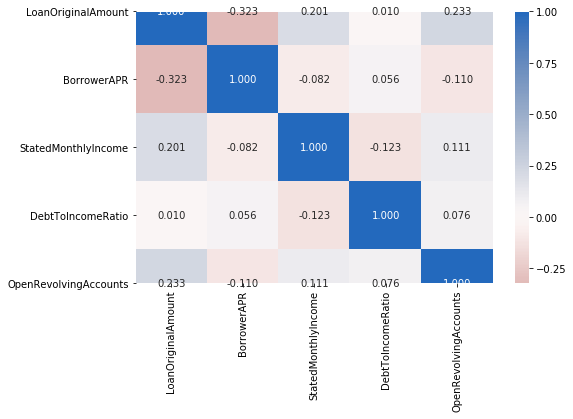

In [57]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

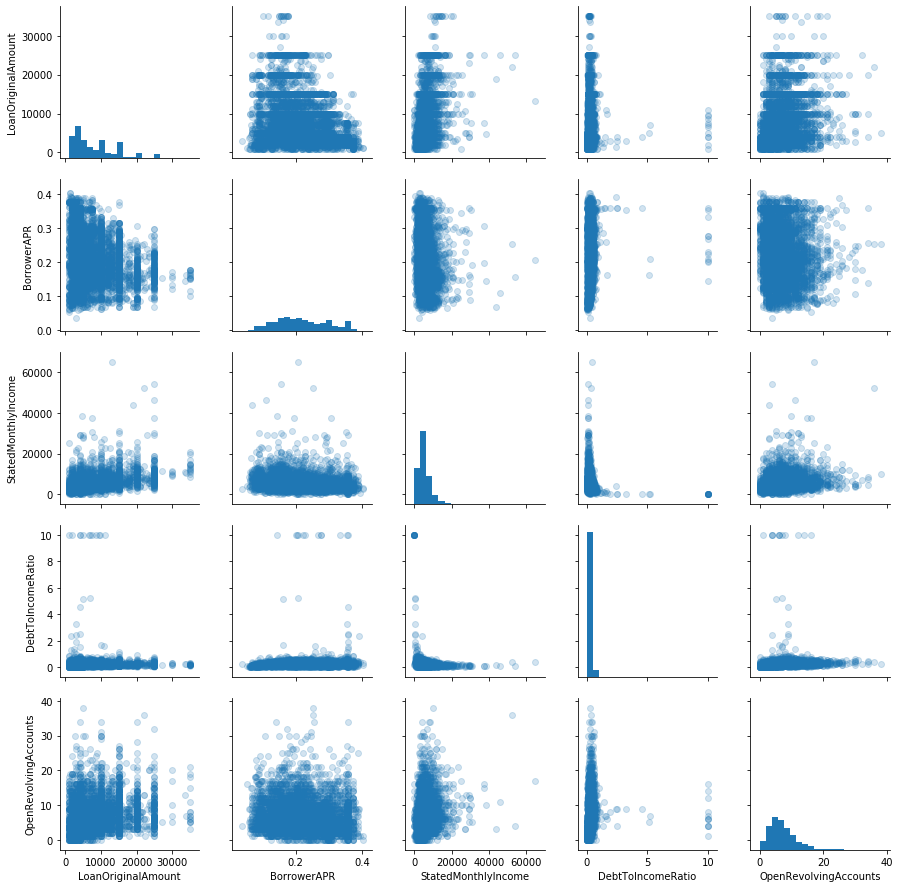

In [58]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
df_samp = df.sample(5000)
g = sb.PairGrid(data = df_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

> The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR.

> The loan original amount is negatively correlated with the BorrowerAPR and OpenRevolvingAccounts

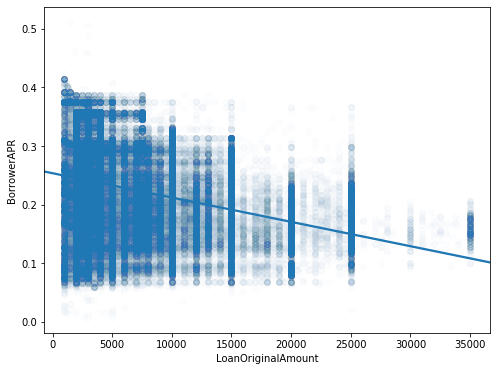

In [59]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

> This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount. 

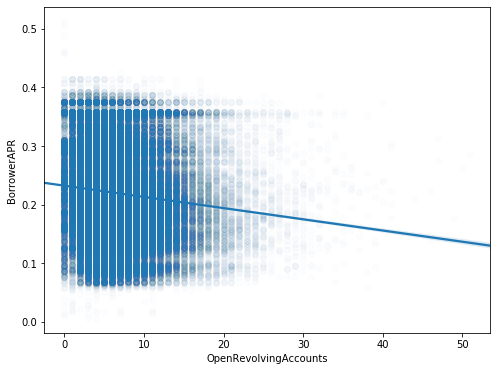

In [60]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'OpenRevolvingAccounts', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

> This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount. 

<Figure size 720x720 with 0 Axes>

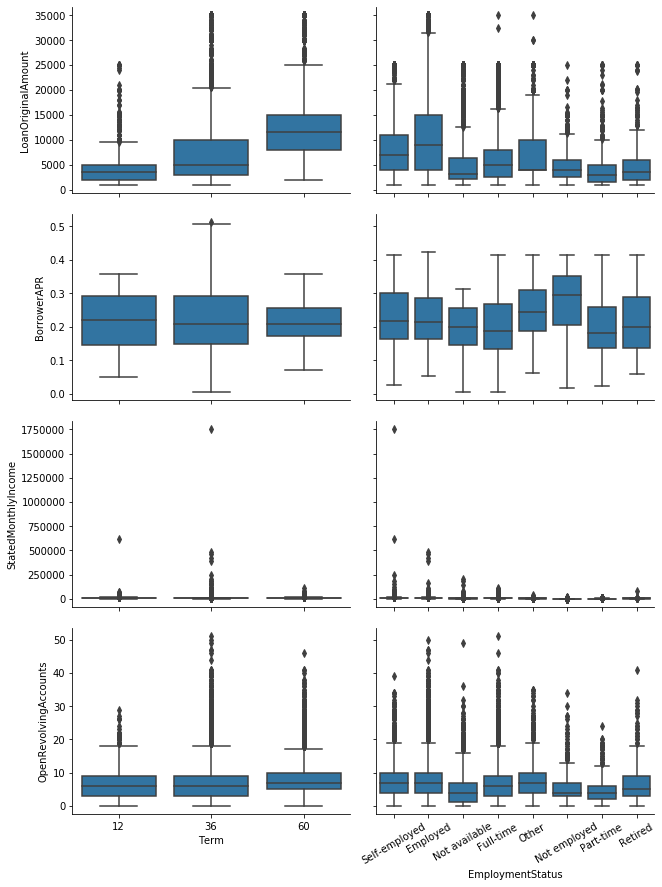

In [61]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','OpenRevolvingAccounts'], 
                x_vars = ['Term', 'EmploymentStatus'], size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

> The figure shows that the loan amount is increased with the increase of loan term. 

> Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

##### Let's look at relationships between the categorical features and our variable of interest - LoanStatus.

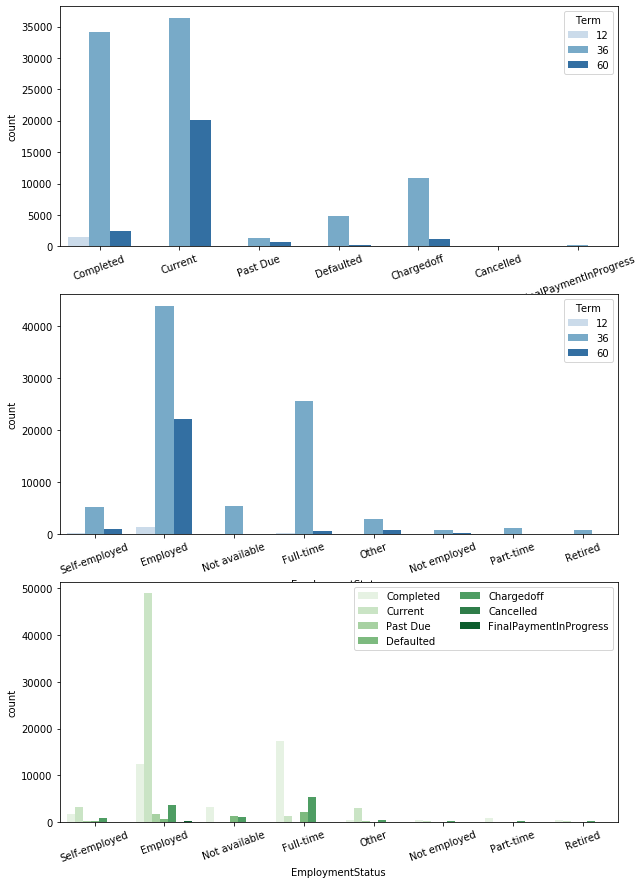

In [62]:
plt.figure(figsize = [10, 15])

# subplot 1: Loan Status vs term
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=20)

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=20)

# subplot 3: Loan Status vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=20);

> The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with LoanStatus.

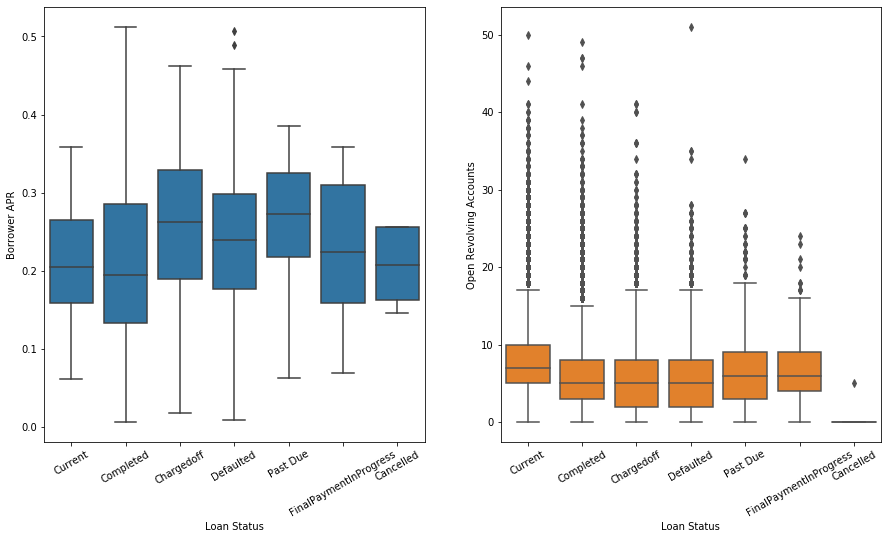

In [63]:
# Order the categorical variable LoanStatus
cat_order = df['LoanStatus'].value_counts().index

# Define figure size
plt.figure(figsize = [15, 8])

# LoanStatus vs BorrowerAPR on the left
default_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=df, x='LoanStatus', y='BorrowerAPR', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=30);

# LoanStatus vs OpenRevolvingAccounts on the right
default_color = sb.color_palette()[1]
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=df, x='LoanStatus', y='OpenRevolvingAccounts', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Open Revolving Accounts')
plt.xticks(rotation=30);

> It appears that there isn't a significant difference between loan status and Open Revolving Accounts. However, 'current' loans have a slight higher median for `OpenRevolvingAccounts` than others status.

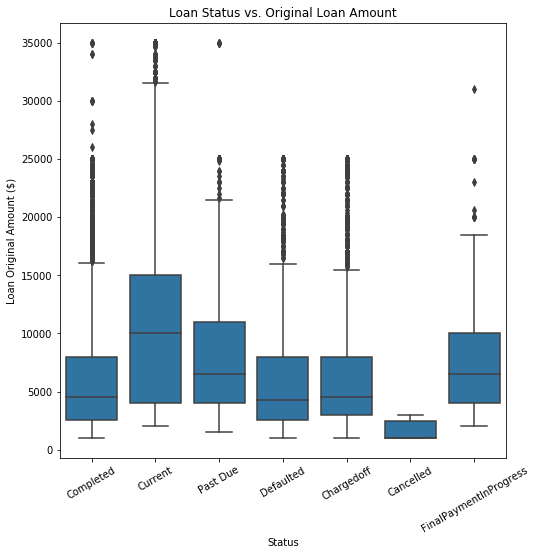

In [64]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=df, x='LoanStatus', y='LoanOriginalAmount', color = default_color)
plt.title('Loan Status vs. Original Loan Amount')
plt.xlabel('Status')
plt.ylabel('Loan Original Amount ($)')
plt.xticks(rotation=30)
plt.show()

> Current loans have a higher original loan amount than the other statuses. Here, I would recommend further investigation alongside Prosper's business analysts to understand if people are getting higher loans or this phenomenon is due to external factors, such as macro-economic ones.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR is negatively correlated with loan amount and Open Revolving Accounts

> Additionally, current loans have a higher original loan amount than the other statuses. Here, I would recommend further investigation alongside Prosper's business analysts to understand if people are getting higher loans or this phenomenon is due to external factors, such as macro-economic ones.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interestingly, it appeared that there isn't a significant difference between loan status and Open Revolving Accounts. However, 'current' loans have a slight higher median for `OpenRevolvingAccounts` than others status.

## Multivariate Exploration 

The main thing I want to explore in this part of the analysis is how the categorical variable 'Term' play into the relationship between (borrower APR, LoanOriginalAmount) and (borrower APR, Open Revolving Accounts)

In [65]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','OpenRevolvingAccounts']
cat_vars = ['LoanStatus', 'EmploymentStatus', 'Term']

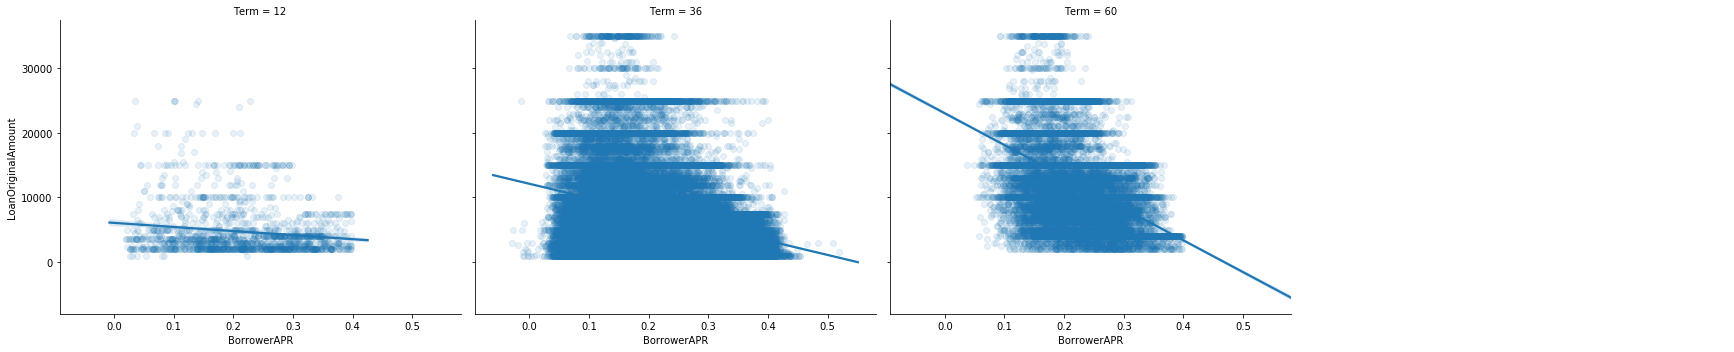

In [66]:
# Term effect on relationship of Borrower APR and Loan Original Amount
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> The intensity of negative correlation between Borrower APR and Loan Original Amount increases with higher term

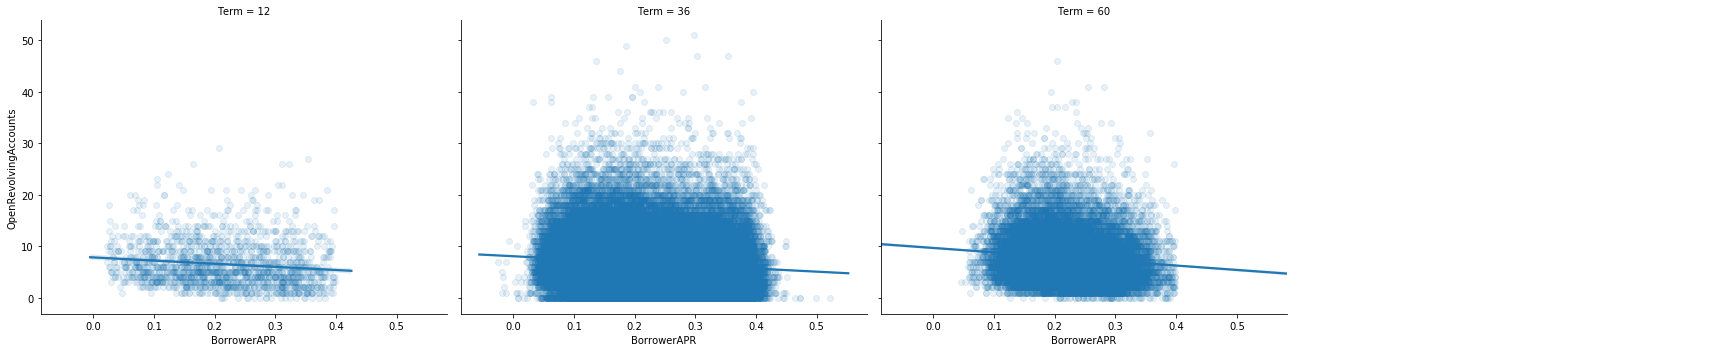

In [67]:
# Term effect on relationship of Borrower APR and Open Revolving Accounts
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'BorrowerAPR', 'OpenRevolvingAccounts', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> Term doesn't seem to have effect on relationship of Borrower APR and Open Revolving Accounts

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this multivariate analysis, Term doesn't seem to have effect on relationship of Borrower APR and Open Revolving Accounts

### Were there any interesting or surprising interactions between features?

> The intensity of negative correlation between Borrower APR and Loan Original Amount increases with higher term